# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>


# 1.1) Testing Parallel Random Number Generator

We aim to evaluate the quality of the given "Parallel Random Number Generator" by assessing the mean value and variance of random numbers from a uniform distribution in the range [0, 1]. Our goal is to verify that these values converge to 1/2 and 1/12, respectively.

The expected mean and variance for a uniform distribution in [0, 1] are:

Mean: $\langle r \rangle = \int_0^1 r dr = 1/2$

Variance: $\sigma^2 = \int_0^1 (r - 1/2)^2 dr = 1/12$

To mitigate potential correlations due to the algorithm's intrinsic determinism, we employ the "Data blocking method":

1. Divide $M = 10^5$ throws into $N = 10^2$ blocks.
2. Calculate mean values, variances, and respective errors for each block.
3. Generate $10^2$ couples $(i, y_i)$, where $i = 0, 1, ..., N-1$ is the block index and $y_i$ is either the mean value or variance of each block.
4. Evaluate the cumulative effect by progressively summing $y_i$ values and calculating the error as the standard deviation of the mean.

To present the results, we will create a graph illustrating the cumulative effect. This will demonstrate the convergence tendency towards the respective theoretical values (1/2 for mean, 1/12 for variance) as we increase the number of throws $M$ considered.

## Mean

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

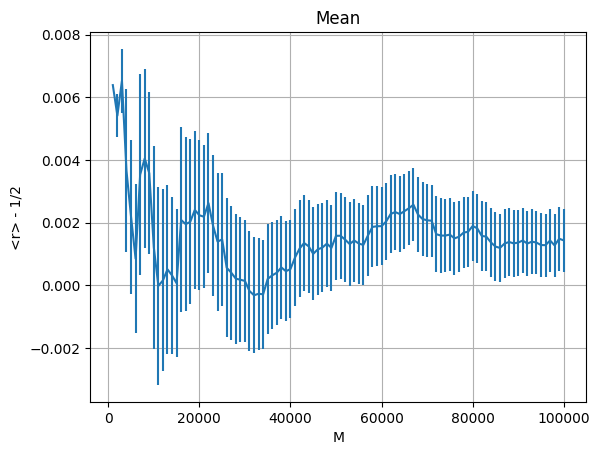

In [9]:
n, a, err = np.loadtxt("punto1.out", usecols=(0,1,2), delimiter="\t", unpack='true')
plt.errorbar(n*1000, a-0.5, yerr=err)
plt.xlabel('M')
plt.ylabel('<r> - 1/2')
plt.title("Mean")
plt.grid(True)
plt.show()

## Variance

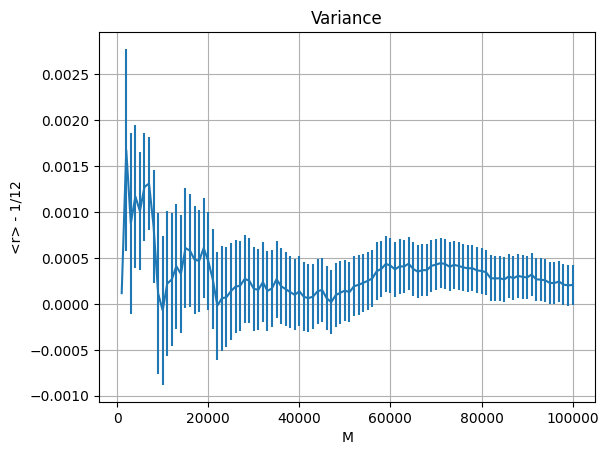

In [8]:
n, a, err = np.loadtxt("punto2.out", usecols=(0,1,2), delimiter="\t", unpack='true')
plt.errorbar(n*1000, a-1/12, yerr=err)
plt.xlabel('M')
plt.ylabel('<r> - 1/12')
plt.title("Variance")
plt.grid(True)
plt.show()

## $\chi^{2}$ Test Limitations

Performing a $\chi^{2}$ test reveals the limitations of the algorithm used.

We generate $n = 10^5$ values with our generator, dividing the interval [0, 1] into $M = 100$ subintervals. We expect the number of values extracted in each subinterval to be simply $n/M$, and that the $\chi^2$ value should therefore be approximately equal to the number of defined subintervals.

In the subsequent histogram we can see that $M = 100$ does not corresponds to the peak of the distribution of $\chi^2$ values obtained in 100 of these tests. It is observed that the values are distributed over a relatively wide interval (~ [80, 130]). This, along with the graphs of mean and variance that do not converge to the expected values, refutes the  hypothesis that the generated numbers come from a random and uniform probability distribution.

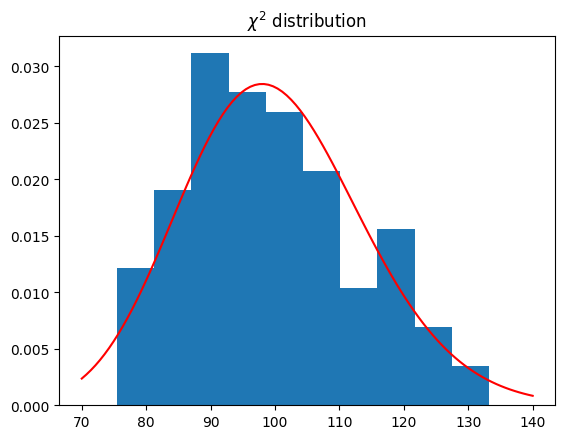

In [12]:
import math
chi=np.loadtxt("punto3.out", usecols=(1), delimiter="\t", unpack='true')
plt.hist(chi, density = True)
def f(x):
    return(x**(50-1))*(np.exp(1)**(-x/2))/(2**50 * math.factorial(49))
    
x = np.linspace(70, 140, 100)
plt.plot(x, f(x), color='red')
plt.title('$\chi^2$ distribution')

plt.show()

# Exercise 1.2) Central limit theorem

In this exercise, we observe the effects of the Central Limit Theorem for some probability distributions:

- Uniform distribution: already given in the Pseudo-Random Number generator downloaded from the NSL Ariel web site.

- Exponential distribution $p(x) = \lambda e^{-\lambda x}$ (sampled with $\lambda = 1$): a distribution of this type can be obtained by inversion of the cumulative. A sequence of values given by $F(r) = -\frac{1}{\lambda} \ln(1 - r)$, with $r$ a random number extracted from a uniform distribution between 0 and 1, satisfies the required condition.

- Lorentzian distribution $p(x) = \frac{1}{\pi} \frac{\Gamma^2}{\Gamma^2 + x^2}$ (sampled with $\Gamma = 1$): a distribution of this type can also be obtained by inversion of the cumulative. The required sequence is given by $F(r) = \Gamma \tan(\pi(r - \frac{1}{2}))$, with $r$ uniformly distributed between 0 and 1.

The figure shows histograms of the distribution of $S_N = \frac{1}{N} \sum_{i=1}^N x_i$ (as $N$ varies), where $x_i$ denotes the result obtained from the throw of a "dice" whose results are distributed according to one of the functions illustrated above. In all cases, the histograms contain $10^4$ estimates of $S_N$.

## Uniform distribution

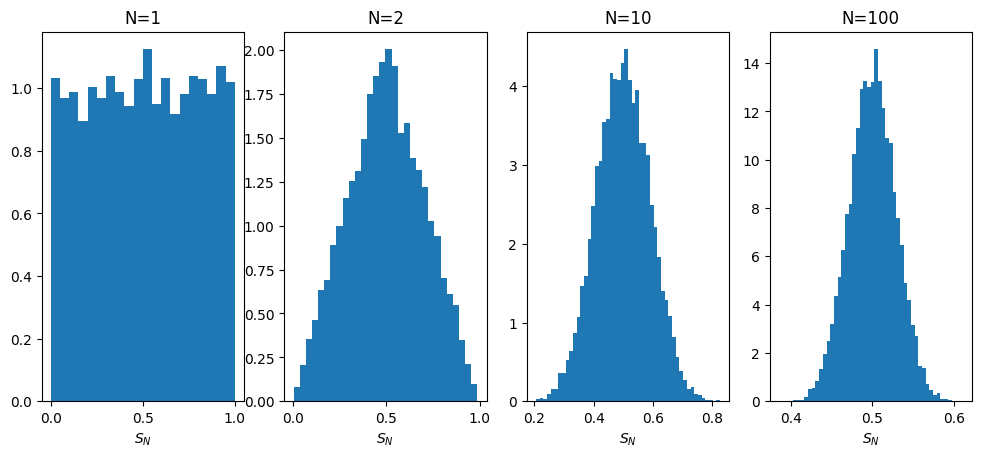

In [18]:
uni, uni2, uni10, uni100 = np.loadtxt("punto12uniform.out", usecols=(0, 1, 2, 3), delimiter= "\t", unpack= 'true')
plt.figure().set_figwidth(12)
plt.subplot(1, 4, 1)
plt.title('N=1')
plt.xlabel('$S_N$')
plt.hist(uni, bins = 20, density = True)
plt.subplot(1, 4, 2)
plt.title('N=2')
plt.xlabel('$S_N$')
plt.hist(uni2, bins = 30, density = True)
plt.subplot(1, 4, 3)
plt.title('N=10')
plt.xlabel('$S_N$')
plt.hist(uni10, bins = 50, density = True)
plt.subplot(1, 4, 4)
plt.title('N=100')
plt.xlabel('$S_N$')
plt.hist(uni100, bins = 50, density = True)
plt.show()

## Exponential distribution

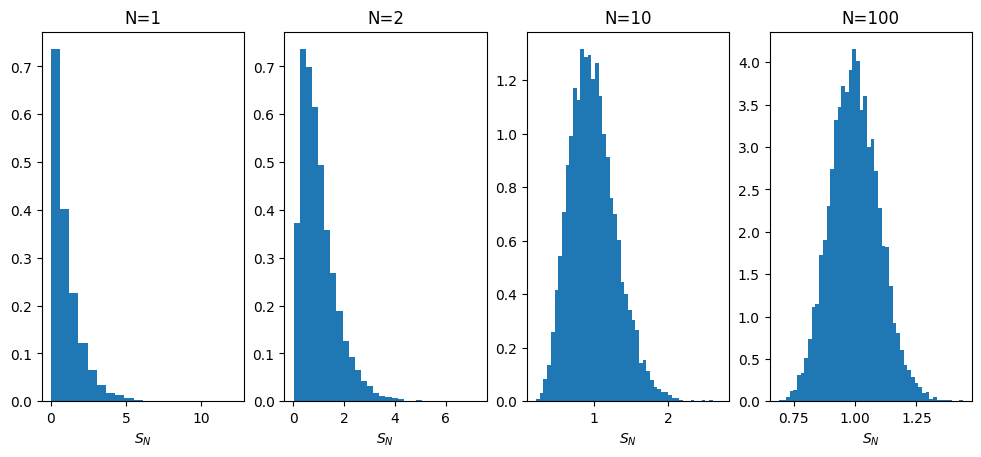

In [20]:
exp1, exp2, exp10, exp100 = np.loadtxt("punto12exp.out", usecols=(0, 1, 2, 3), delimiter= "\t", unpack= 'true')
plt.figure().set_figwidth(12)
plt.subplot(1, 4, 1)
plt.xlabel('$S_N$')
plt.title('N=1')
plt.hist(exp1, bins = 20, density = True)
plt.subplot(1, 4, 2)
plt.xlabel('$S_N$')
plt.title('N=2')
plt.hist(exp2, bins = 30, density = True)
plt.subplot(1, 4, 3)
plt.xlabel('$S_N$')
plt.title('N=10')
plt.hist(exp10, bins = 50, density = True)
plt.subplot(1, 4, 4)
plt.xlabel('$S_N$')
plt.title('N=100')
plt.hist(exp100, bins = 50, density = True)
plt.show()

## Lorentzian distribution

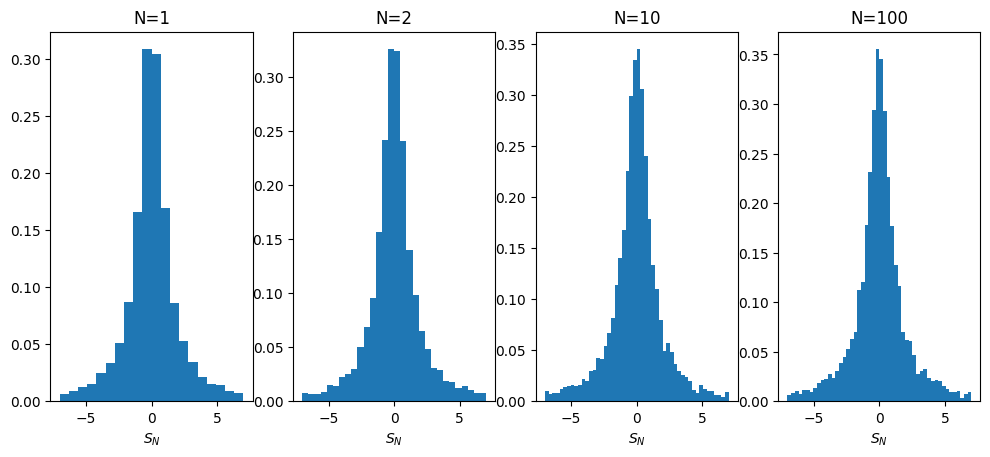

In [21]:
lor, lor2, lor10, lor100 = np.loadtxt("punto12Cau.out", usecols=(0, 1, 2, 3), delimiter= "\t", unpack= 'true')
plt.figure().set_figwidth(12)
plt.subplot(1, 4, 1)
plt.xlabel('$S_N$')
plt.title('N=1')
plt.hist(lor, bins = 20, range= [-7, 7], density = True)
plt.subplot(1, 4, 2)
plt.xlabel('$S_N$')
plt.title('N=2')
plt.hist(lor2, bins = 30, range= [-7, 7], density = True)
plt.subplot(1, 4, 3)
plt.xlabel('$S_N$')
plt.title('N=10')
plt.hist(lor10, bins = 50, range= [-7, 7], density = True)
plt.subplot(1, 4, 4)
plt.xlabel('$S_N$')
plt.title('N=100')
plt.hist(lor100, bins = 50, range= [-7, 7], density = True)
plt.show()

For every distribution we can see the tendency of the sum toward the Gaussian (for uniform and exponential distributions) and the Lorentzian (for the Lorentzian distribution) distribution.

This exercise should actually consider that the roll of a dice can only result in discrete values between 1 and 6. The images shown were created by omitting this and using continuous distributions instead.

## Exercise 1.3) Buffon's experiment

In this exercise, we simulate Buffon's experiment. This experiment consists of randomly dropping a needle of length $L$ onto a floor with parallel lines spaced $d > L$ apart. It can be proven that the probability of the needle crossing a line depends on π, and we can therefore invert the formula to obtain a "Monte Carlo" estimate of $π$. We have:

$$\lim_{N \to \infty} \frac{2LN}{Md} = \frac{2L}{Pd} = \pi$$

where N is the total number of drops and M is the number of drops where the needle crosses a line.

The simulation of this experiment confronts an important problem: to "drop" the needle, we need to generate the coordinates of one of its ends and the angle at which it falls on the floor. This would require a value uniformly distributed in [0, 2π] for an experiment attempting to calculate π. The issue can be resolved by generating two-dimensional points with coordinates (x, y) inside a circle (centered at (0, 0) for convenience) using an Accept-Reject method.

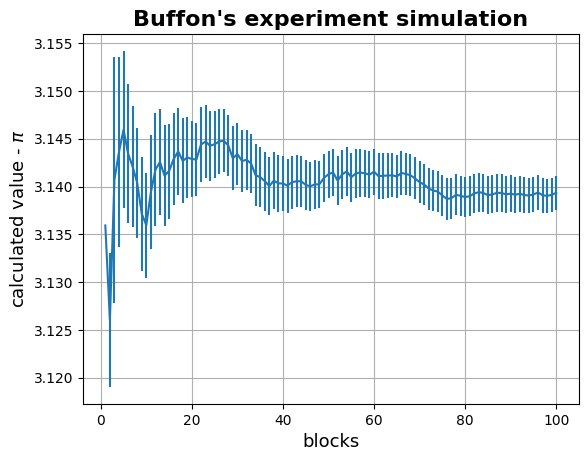

In [23]:
n, a, err = np.loadtxt("punto13.out", usecols=(0,1,2), delimiter="\t", unpack='true')
plt.errorbar(n, a, yerr=err)
plt.grid(True)
plt.title("Buffon's experiment simulation",fontweight='bold',fontsize=16)
plt.xlabel("blocks",fontsize=13)
plt.ylabel(r'calculated value - $\pi$',fontsize=13)
plt.show()